<a href="https://colab.research.google.com/github/Vineet2107/EEG_Pipeline/blob/main/Processing_EEG_dataset_with_RNN_LSTM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# This program aims to accurately predict the emotional states of a subject while watching various movie scenes given their EEG readings using a recurrent neural network
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

#from sklearn.metrics import confusion_matrix, classification_report

In [51]:
data = pd.read_csv('/content/drive/MyDrive/emotions.csv')

In [31]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.70,27.9,3.170,32.2,-368.0,15.90,36.4,7.08,28.8,-359.0,17.30,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.600,-1.540,-14.900000,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.00,-185.00,-185.00,374.00,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.20,32.9,31.800,33.1,33.2,28.50,26.8,32.40,34.7,33.8,27.00,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.530,-6.980,-9.370000,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.00,40.70,40.70,-19.00,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.40,20.0,79.800,31.0,-408.0,91.90,29.5,18.80,31.1,-335.0,32.20,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.000,-82.000,-4.200000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.00,-48.80,-48.80,159.00,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.90,27.7,15.700,30.7,-142.0,20.70,22.8,13.60,32.2,-135.0,21.20,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.830,-0.298,0.000777,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.90,-5.08,-5.08,-61.90,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.00,22.9,59.400,26.7,60.3,64.70,26.9,32.30,30.1,33.6,31.60,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.600,-41.100,-6.290000,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.90,-7.25,-7.25,15.90,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,33.30,33.4,31.0,32.30,18.6,30.00,33.0,32.6,29.50,29.1,32.000,29.9,32.6,28.50,24.9,34.50,32.4,32.4,33.00,20.8,3.3500,0.461,-1.61000,2.880,-10.60,1.31,3.490,-1.540,3.860

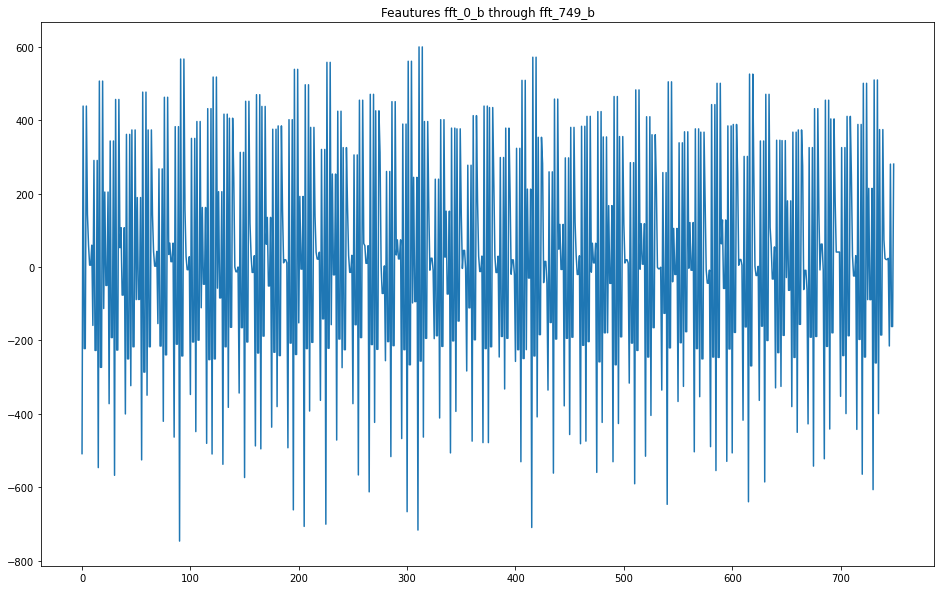

In [32]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()

In [33]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [34]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [35]:

def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_mapping)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [36]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [37]:
X_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_710_b,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.50,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.040,17.700,31.1,-101.0,20.40,27.7,14.700,30.6,-120.0,20.00,22.3,5.45,27.1,-120.0,13.70,19.8,19.500,30.1,-106.0,20.10,21.9,3.020,0.4640,18.900,0.3540,5.38,12.30,3.990,18.90,6.67,7.8200,...,-202.0,174.00,-89.900,-89.900,174.00,148.0,25.00,-29.80,-29.80,25.00,269.000,-103.00,63.50,63.50,-103.00,-71.2,85.60,-61.30,-61.30,85.60,29.8,107.0,-68.40,-68.40,107.0,269.0,28.40,-58.30,-58.30,28.40,-50.0,150.00,-150.00,-150.00,150.00,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.40,27.1,3.27000,1.1200,6.480,2.300,5.660,13.300,22.2,16.0,7.73,25.8,10.800,22.3,20.4,6.78,22.8,15.20,26.0,20.4,9.75,28.9,15.500,20.8,29.0,9.36,31.0,2.550,-0.0606,-4.470,0.9500,3.00,-1.83,-3.760,-4.40,-2.02,-3.0700,...,178.0,-60.50,-0.106,-0.106,-60.50,124.0,-57.90,26.10,26.10,-57.90,163.000,-36.70,17.90,17.90,-36.70,138.0,-54.70,-66.90,-66.90,-54.70,68.6,-46.5,-58.00,-58.00,-46.5,160.0,-38.90,-3.29,-3.29,-38.90,74.2,-76.00,-10.90,-10.90,-76.00,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.90,27.9,-1.44000,-4.2000,-8.310,-4.340,4.040,-0.199,29.3,-580.0,15.10,24.1,0.109,24.5,-569.0,13.10,27.6,1.79,22.6,-559.0,11.10,38.0,-4.680,22.7,-606.0,8.42,22.0,-0.308,4.7800,-11.300,2.0100,-3.48,-1.99,6.680,-21.00,3.99,-13.9000,...,-873.0,653.00,-355.000,-355.000,653.00,-571.0,634.00,-289.00,-289.00,634.00,-41.000,158.00,-50.50,-50.50,158.00,-719.0,566.00,-342.00,-342.00,566.00,-680.0,685.0,-317.00,-317.00,685.0,-112.0,235.00,-71.00,-71.00,235.00,-803.0,619.00,-331.00,-331.00,619.00,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.30,24.6,-0.00524,-0.0699,1.680,0.266,-4.470,25.700,33.2,27.5,27.10,30.0,30.600,32.1,34.9,33.10,23.7,28.40,33.8,32.9,30.30,21.1,28.000,31.4,33.0,30.60,23.5,-4.860,1.1300,-7.380,-5.9600,6.26,-2.70,-0.581,-5.35,-3.13,8.8800,...,155.0,-9.87,-28.400,-28.400,-9.87,136.0,2.17,-1.11,-1.11,2.17,48.200,-12.60,53.00,53.00,-12.60,206.0,-4.30,-55.10,-55.10,-4.30,168.0,18.9,-37.20,-37.20,18.9,131.0,9.69,10.90,10.90,9.69,167.0,-24.40,-18.10,-18.10,-24.40,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.80,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.390,32.700,29.9,34.9,31.80,32.5,35.800,33.4,34.3,31.70,21.0,27.00,32.0,32.3,27.50,23.8,31.900,28.5,36.1,32.30,18.9,-3.170,-3.5500,0.668,0.0455,11.60,5.63,-2.180,2.60,4.31,8.7400,...,131.0,-9.38,-7.340,-7.340,-9.38,126.0,-14.00,41.30,41.30,-14.00,124.000,-13.80,16.70,16.70,-13.80,157.0,-17.10,-7.39,-7.39,-17.10,129.0,-14.5,12.00,12.00,-14.5,112.0,-23.40,41.60,41.60,-23.40,130.0,-25.70,4.10,4.10,-25.70,131.0,-21.70,19.60,19.60,-21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.820,32.9,-741.0,32.60,27.0,-0.41300,-2.6300,-87.300,-26.200,-3.350,8.190,33.9,-662.0,59.30,34.3,5.890,34.5,-732.0,32.50,23.2,5.86,31.5,-766.0,19.00,23.5,7.350,31.6,-803.0,20.10,27.1,2.300,-0.6200,70.100,26.8000,11.10,2.34,

In [46]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
#simplernn = tf.keras.layers.SimpleRNN(128)(gru)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 2548)]            0         
_________________________________________________________________
tf.expand_dims_16 (TFOpLambd (None, 2548, 1)           0         
_________________________________________________________________
gru_12 (GRU)                 (None, 2548, 256)         198912    
_________________________________________________________________
flatten_9 (Flatten)          (None, 652288)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 1956867   
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
38/38 [==============================] - 6s 131ms/step - loss: 49.7921 - accuracy: 0.7888 - val_loss: 17.3205 - val_accuracy: 0.8127
Epoch 2/10
38/38 [==============================] - 5s 121ms/step - loss: 10.4980 - accuracy: 0.8986 - val_loss: 4.9831 - val_accuracy: 0.8896
Epoch 3/10
38/38 [==============================] - 5s 120ms/step - loss: 1.8055 - accuracy: 0.9547 - val_loss: 6.9388 - val_accuracy: 0.9231
Epoch 4/10
38/38 [==============================] - 5s 121ms/step - loss: 0.9473 - accuracy: 0.9740 - val_loss: 5.1711 - val_accuracy: 0.9164
Epoch 5/10
38/38 [==============================] - 5s 120ms/step - loss: 0.4172 - accuracy: 0.9874 - val_loss: 4.7518 - val_accuracy: 0.9298
Epoch 6/10
38/38 [==============================] - 4s 118ms/step - loss: 0.1630 - accuracy: 0.9916 - val_loss: 2.7593 - val_accuracy: 0.9498
Epoch 7/10
38/38 [==============================] - 5s 119ms/step - loss: 0.0722 - accuracy: 0.9966 - val_loss: 1.4899 - val_accuracy: 0.9632
Epo

In [48]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 95.312%


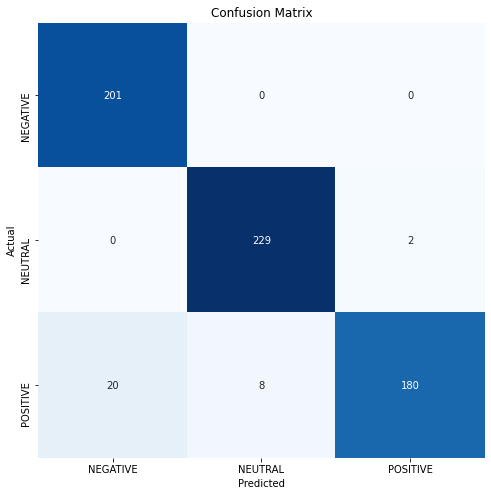

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.91      1.00      0.95       201
     NEUTRAL       0.97      0.99      0.98       231
    POSITIVE       0.99      0.87      0.92       208

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.96      0.95      0.95       640



In [52]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)